In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


# Library

In [48]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import sklearn
import warnings

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# using deep learning tensorflow (decision forest)
import tensorflow as tf
import tensorflow_decision_forests as tfdf

print(f"Found TF-DF {tfdf.__version__}")

#Machine Learning
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import norm  # Add this line to import norm

Found TF-DF 1.5.0


# Collection Data

In [49]:
df = pd.read_csv("/kaggle/input/top-spotify-songs-2023/spotify-2023.csv", encoding="ISO-8859-1")
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Exploring And Glimspy Data

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Checking Missing Value

In [51]:
df.isnull().value_counts()

track_name  artist(s)_name  artist_count  released_year  released_month  released_day  in_spotify_playlists  in_spotify_charts  streams  in_apple_playlists  in_apple_charts  in_deezer_playlists  in_deezer_charts  in_shazam_charts  bpm    key    mode   danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%
False       False           False         False          False           False         False                 False              False    False               False            False                False             False             False  False  False  False           False      False     False           False               False       False            817
                                                                                                                                                                                                                                              True   False  False           False      False     Fa

In [52]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
948    False
949    False
950    False
951    False
952    False
Length: 953, dtype: bool>

# Stastistik Data

In [53]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


# Exploratory Data Analysis

## Unvariate Analysis

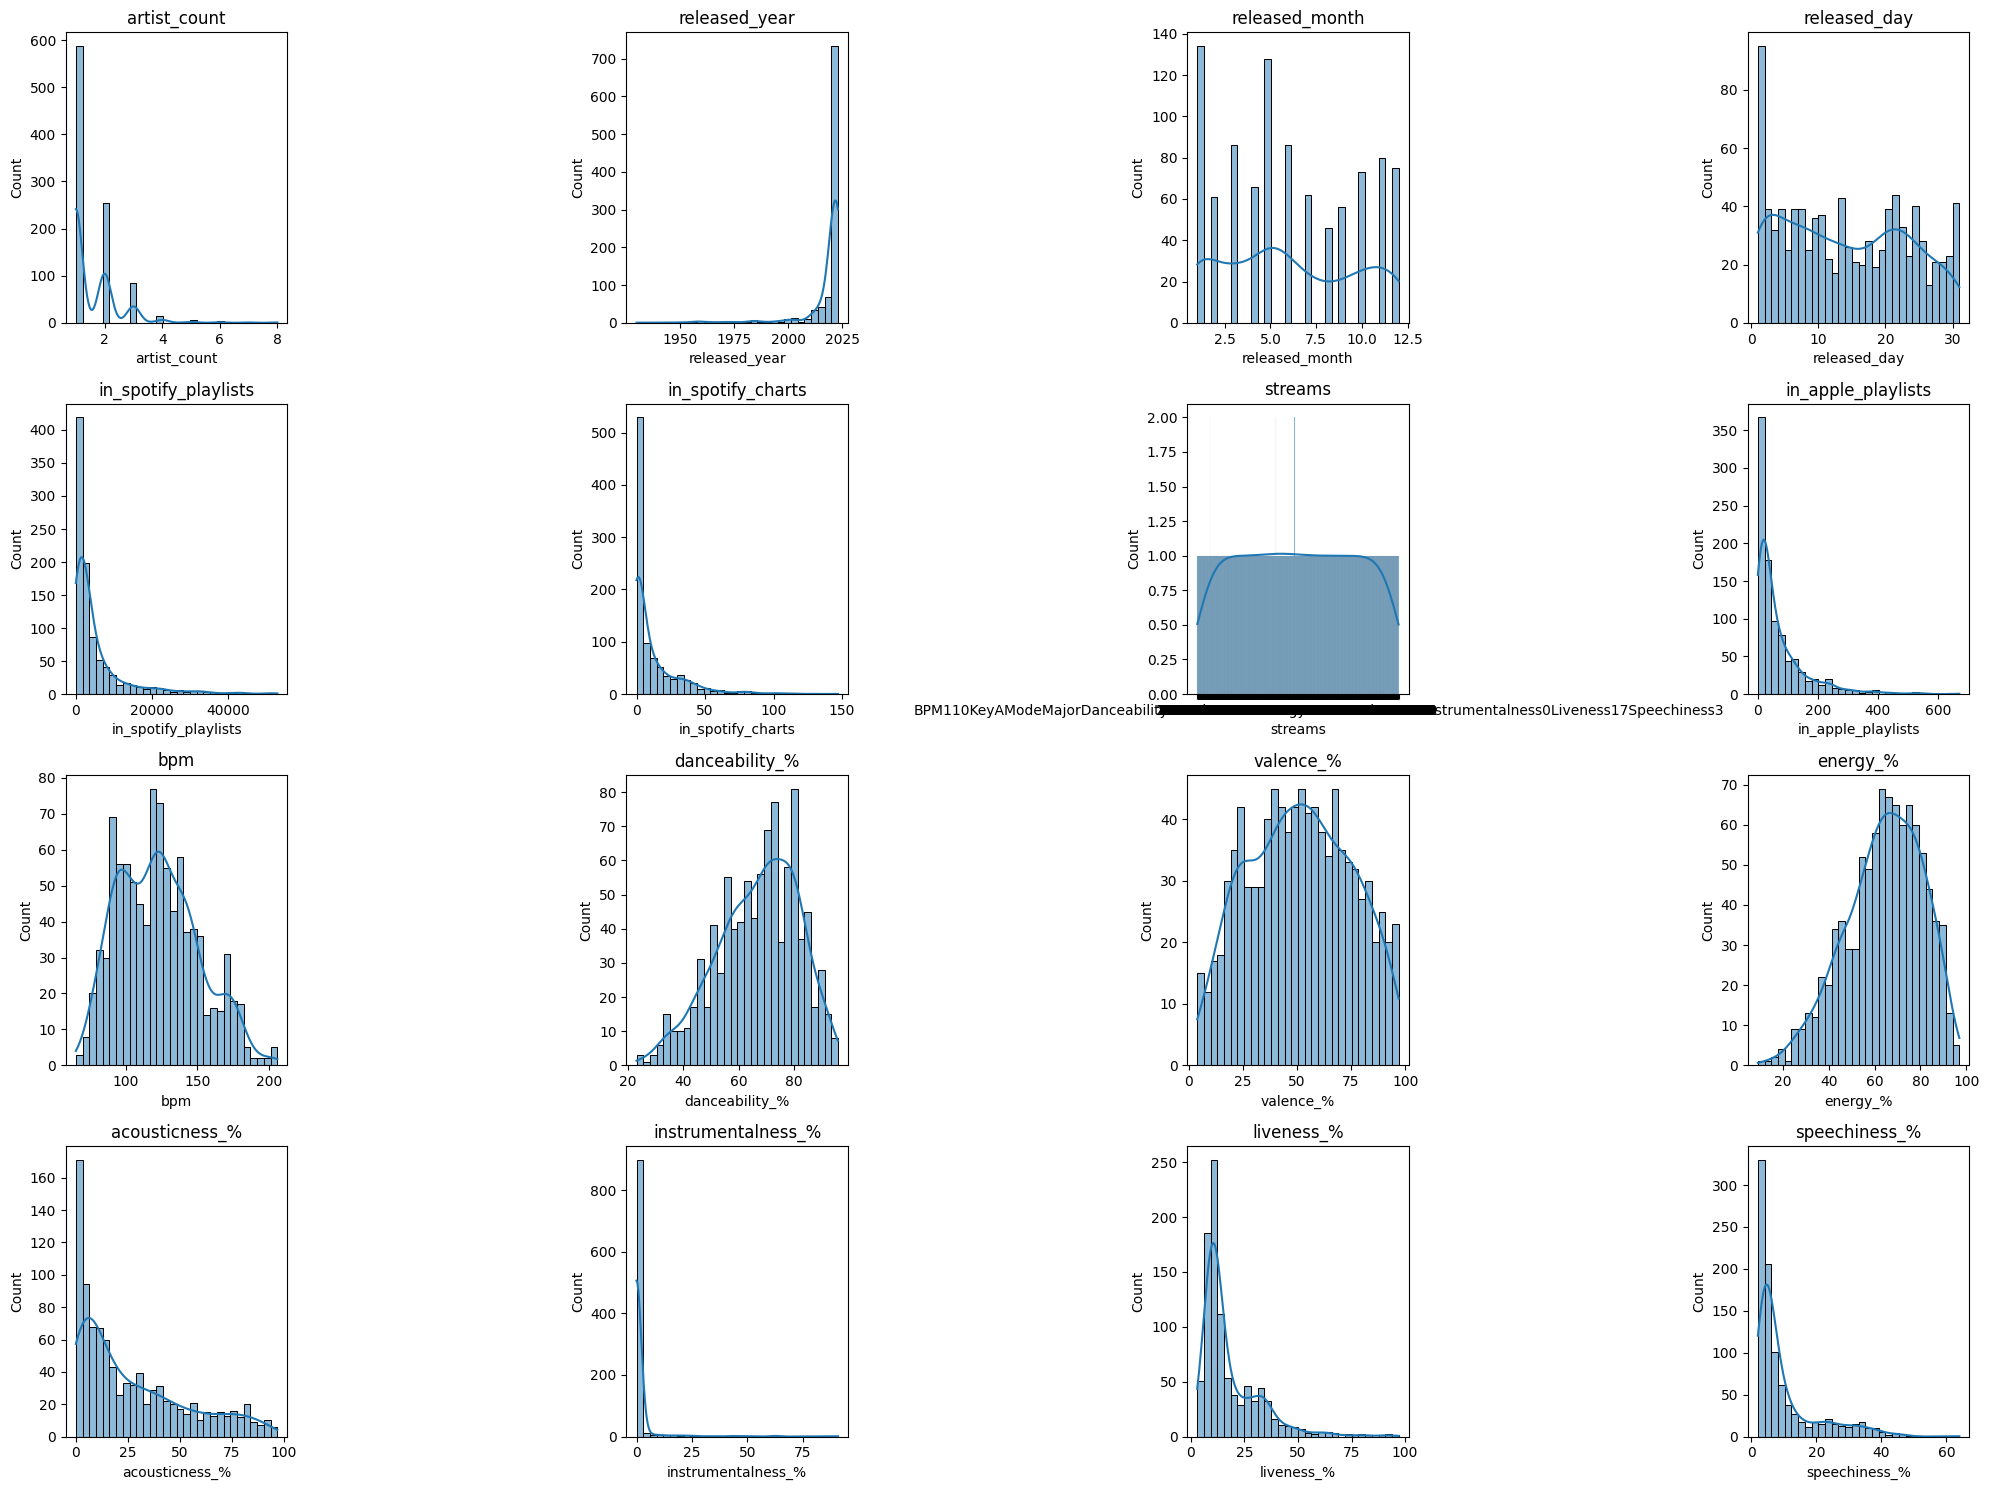

(       artist_count  released_year  released_month  released_day  \
 count    953.000000     953.000000      953.000000    953.000000   
 mean       1.556139    2018.238195        6.033578     13.930745   
 std        0.893044      11.116218        3.566435      9.201949   
 min        1.000000    1930.000000        1.000000      1.000000   
 25%        1.000000    2020.000000        3.000000      6.000000   
 50%        1.000000    2022.000000        6.000000     13.000000   
 75%        2.000000    2022.000000        9.000000     22.000000   
 max        8.000000    2023.000000       12.000000     31.000000   
 
        in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
 count            953.000000         953.000000          953.000000   
 mean            5200.124869          12.009444           67.812172   
 std             7897.608990          19.575992           86.441493   
 min               31.000000           0.000000            0.000000   
 25%              875.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA (Exploratory Data Analysis) for the Spotify dataset

# Load the data again (assuming the same encoding as before)
spotify_data = df

# EDA will include:
# 1. Basic statistics of the dataset
basic_stats = spotify_data.describe()

# 2. Distribution of numerical features
numerical_features = ['artist_count', 'released_year', 'released_month', 'released_day', 
                      'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists',
                      'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
                      'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Plotting histograms for numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    sns.histplot(spotify_data[feature], kde=True, bins=30)
    plt.title(feature)
plt.tight_layout()

basic_stats, plt.show()  # Show basic statistics and histograms

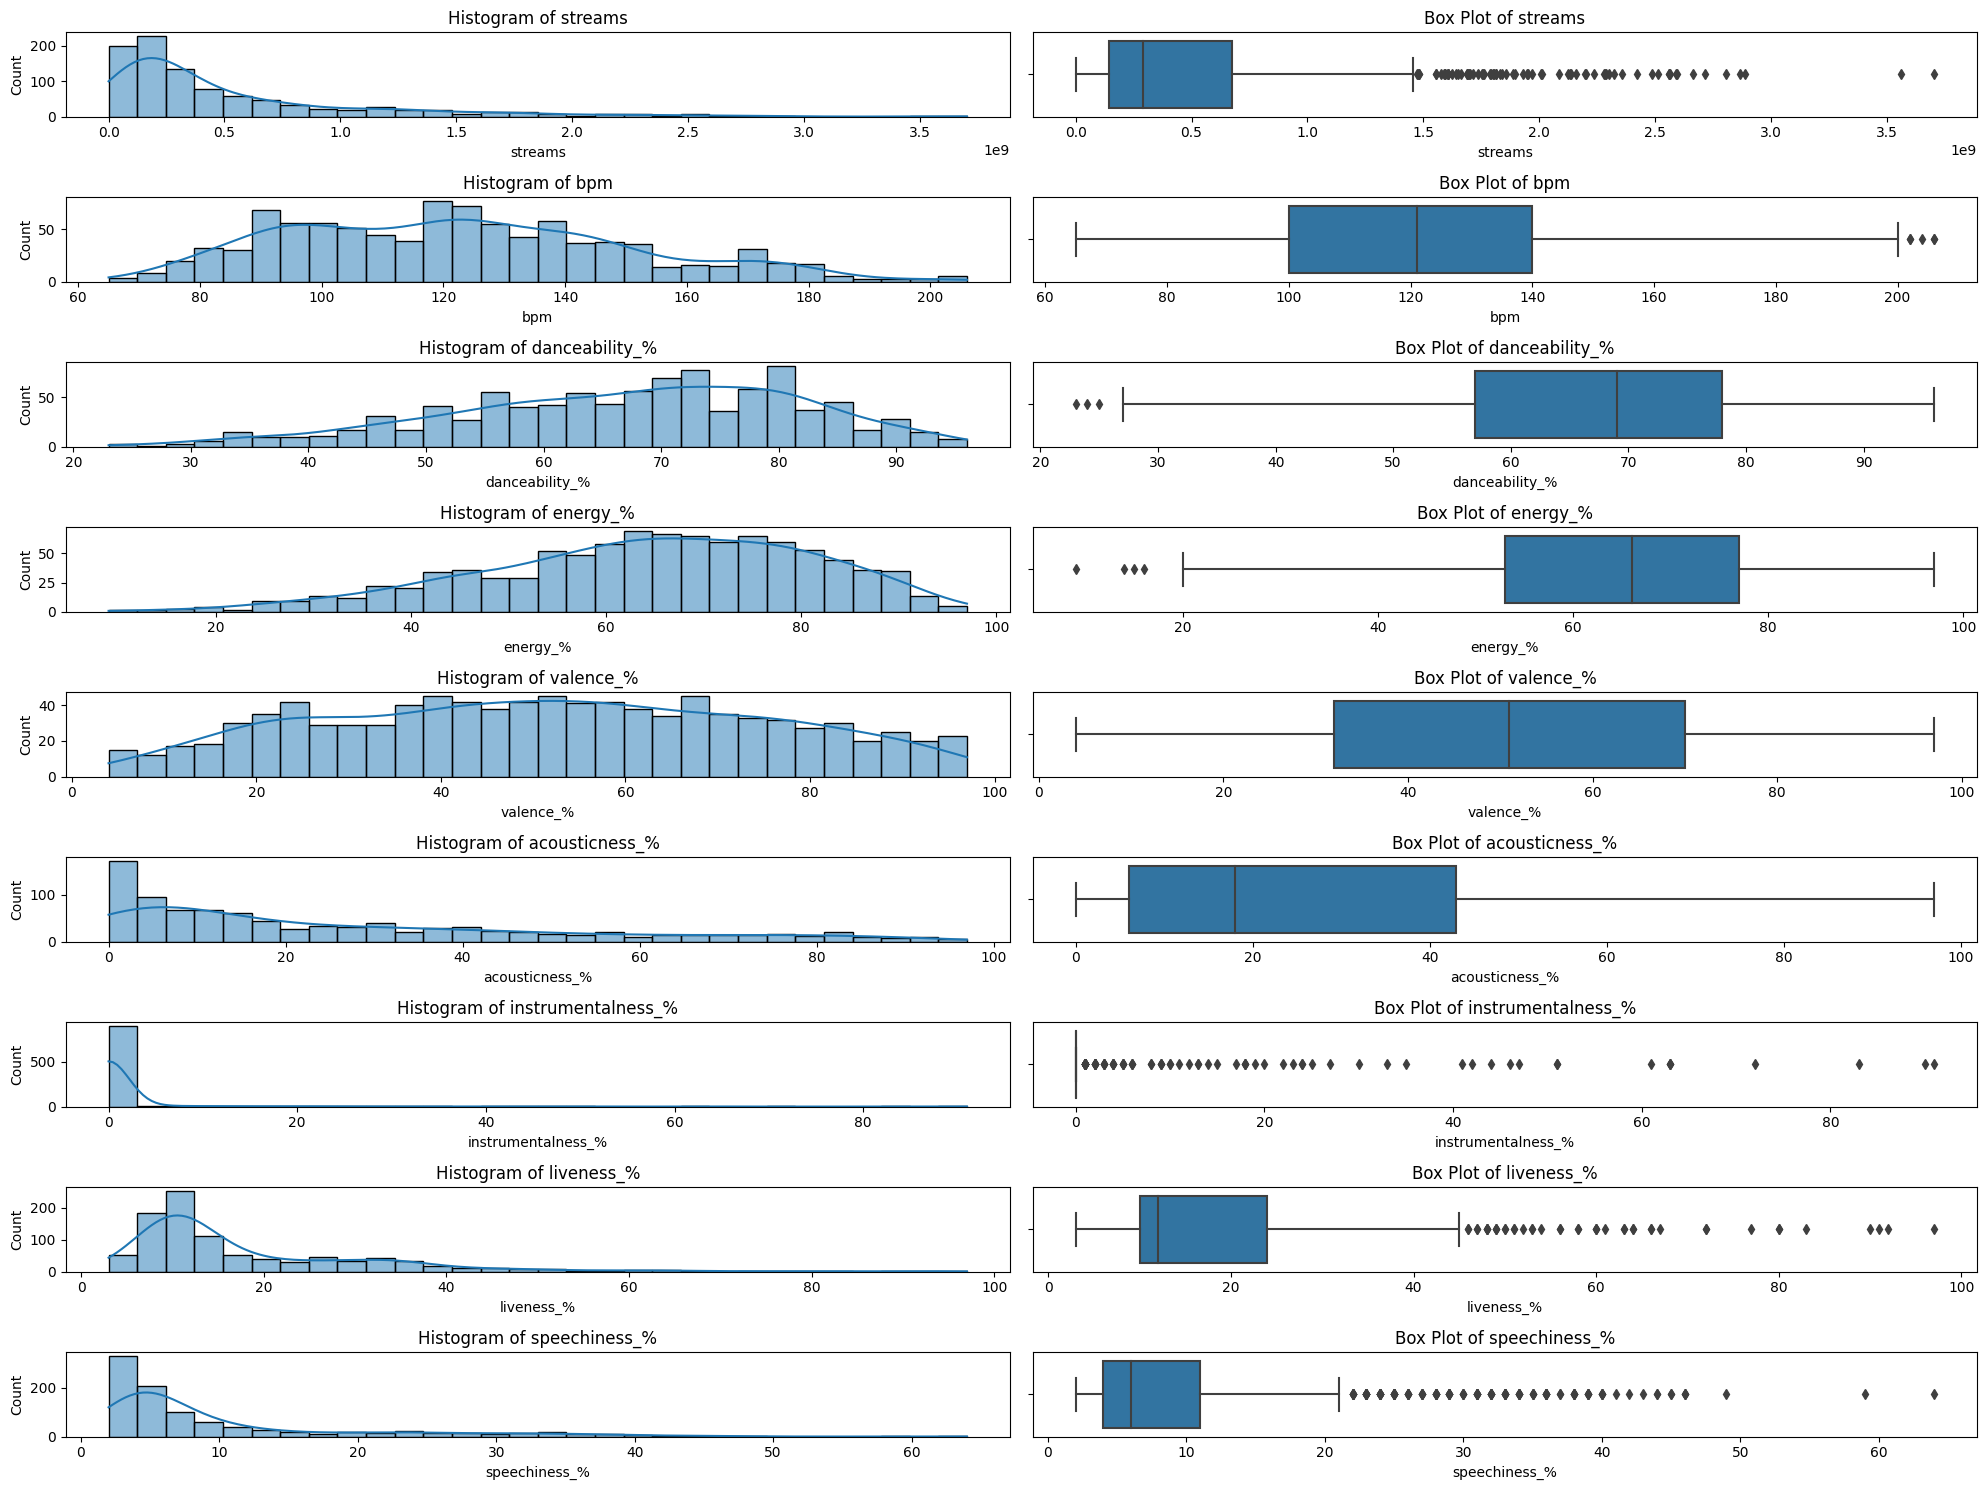

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your DataFrame
df = df

features_for_univariate_analysis = ['streams', 'bpm', 'danceability_%', 'energy_%', 
                                    'valence_%', 'acousticness_%', 'instrumentalness_%', 
                                    'liveness_%', 'speechiness_%']

plt.figure(figsize=(20, 15))

# Plotting histograms and box plots for each feature
for i, feature in enumerate(features_for_univariate_analysis):
    # Convert the feature to numeric, handling non-numeric values
    numeric_feature = pd.to_numeric(df[feature], errors='coerce')

    # Histogram
    plt.subplot(len(features_for_univariate_analysis), 2, 2*i + 1)
    sns.histplot(numeric_feature, kde=True, bins=30)
    plt.title(f'Histogram of {feature}')

    # Box Plot
    plt.subplot(len(features_for_univariate_analysis), 2, 2*i + 2)
    sns.boxplot(x=numeric_feature)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()

# Basic descriptive statistics for each feature
descriptive_stats = df[features_for_univariate_analysis].apply(pd.to_numeric, errors='coerce').describe()

descriptive_stats
plt.show()

## Bivarate ANalysis

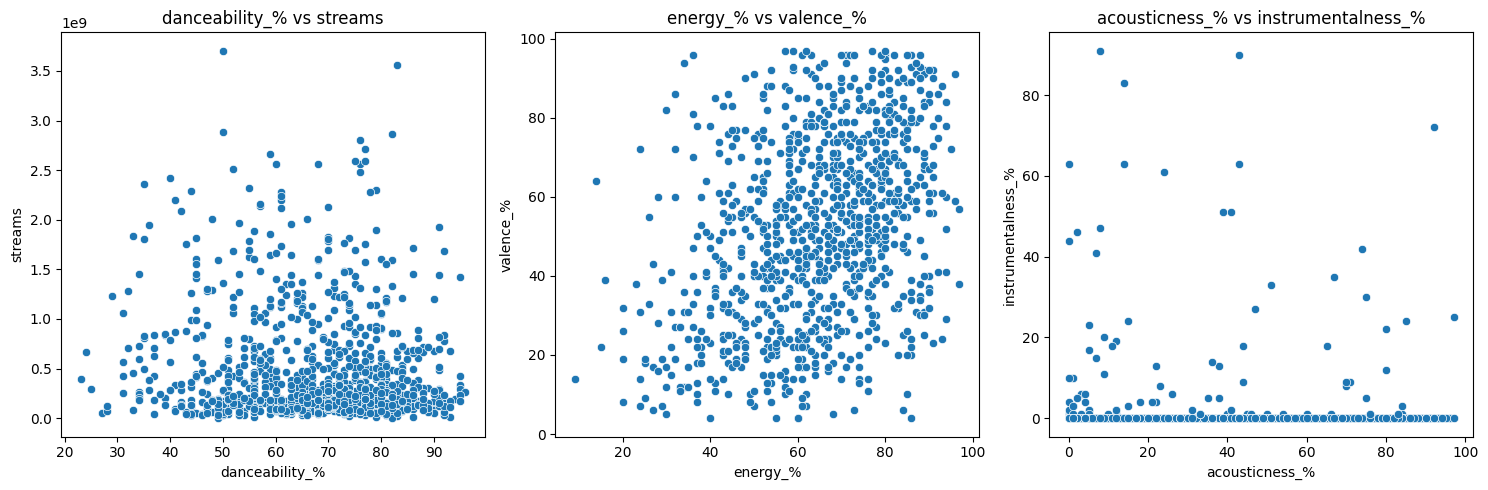

,danceability_%,streams,energy_%,valence_%,acousticness_%,instrumentalness_%
danceability_%,1.000000,-0.105457,0.198095,0.408451,-0.236165,-0.089138
streams,-0.105457,1.000000,-0.026051,-0.040831,-0.004485,-0.044902
energy_%,0.198095,-0.026051,1.000000,0.357612,-0.577344,-0.038547
valence_%,0.408451,-0.040831,0.357612,1.000000,-0.081907,-0.132890
acousticness_%,-0.236165,-0.004485,-0.577344,-0.081907,1.000000,0.042796
instrumentalness_%,-0.089138,-0.044902,-0.038547,-0.132890,0.042796,1.000000


In [56]:
# Reloading the DataFrame to ensure proper access for the bivariate analysis
df = df

# Bivariate analysis - examining relationships between pairs of variables
# Common pairs for this dataset could include: streams vs danceability, energy vs valence, and acousticness vs instrumentalness

# Ensuring the data is numeric for analysis
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Selecting a few pairs for analysis
pair1 = ('danceability_%', 'streams')
pair2 = ('energy_%', 'valence_%')
pair3 = ('acousticness_%', 'instrumentalness_%')

# Plotting scatter plots for each pair
plt.figure(figsize=(15, 5))

# Pair 1: Streams vs Danceability
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_numeric, x=pair1[0], y=pair1[1])
plt.title(f'{pair1[0]} vs {pair1[1]}')

# Pair 2: Energy vs Valence
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_numeric, x=pair2[0], y=pair2[1])
plt.title(f'{pair2[0]} vs {pair2[1]}')

# Pair 3: Acousticness vs Instrumentalness
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_numeric, x=pair3[0], y=pair3[1])
plt.title(f'{pair3[0]} vs {pair3[1]}')

plt.tight_layout()

# Display the scatter plots
plt.show()

# Calculating correlation for these pairs
correlation_data = df_numeric[[pair1[0], pair1[1], pair2[0], pair2[1], pair3[0], pair3[1]]].corr()
correlation_data


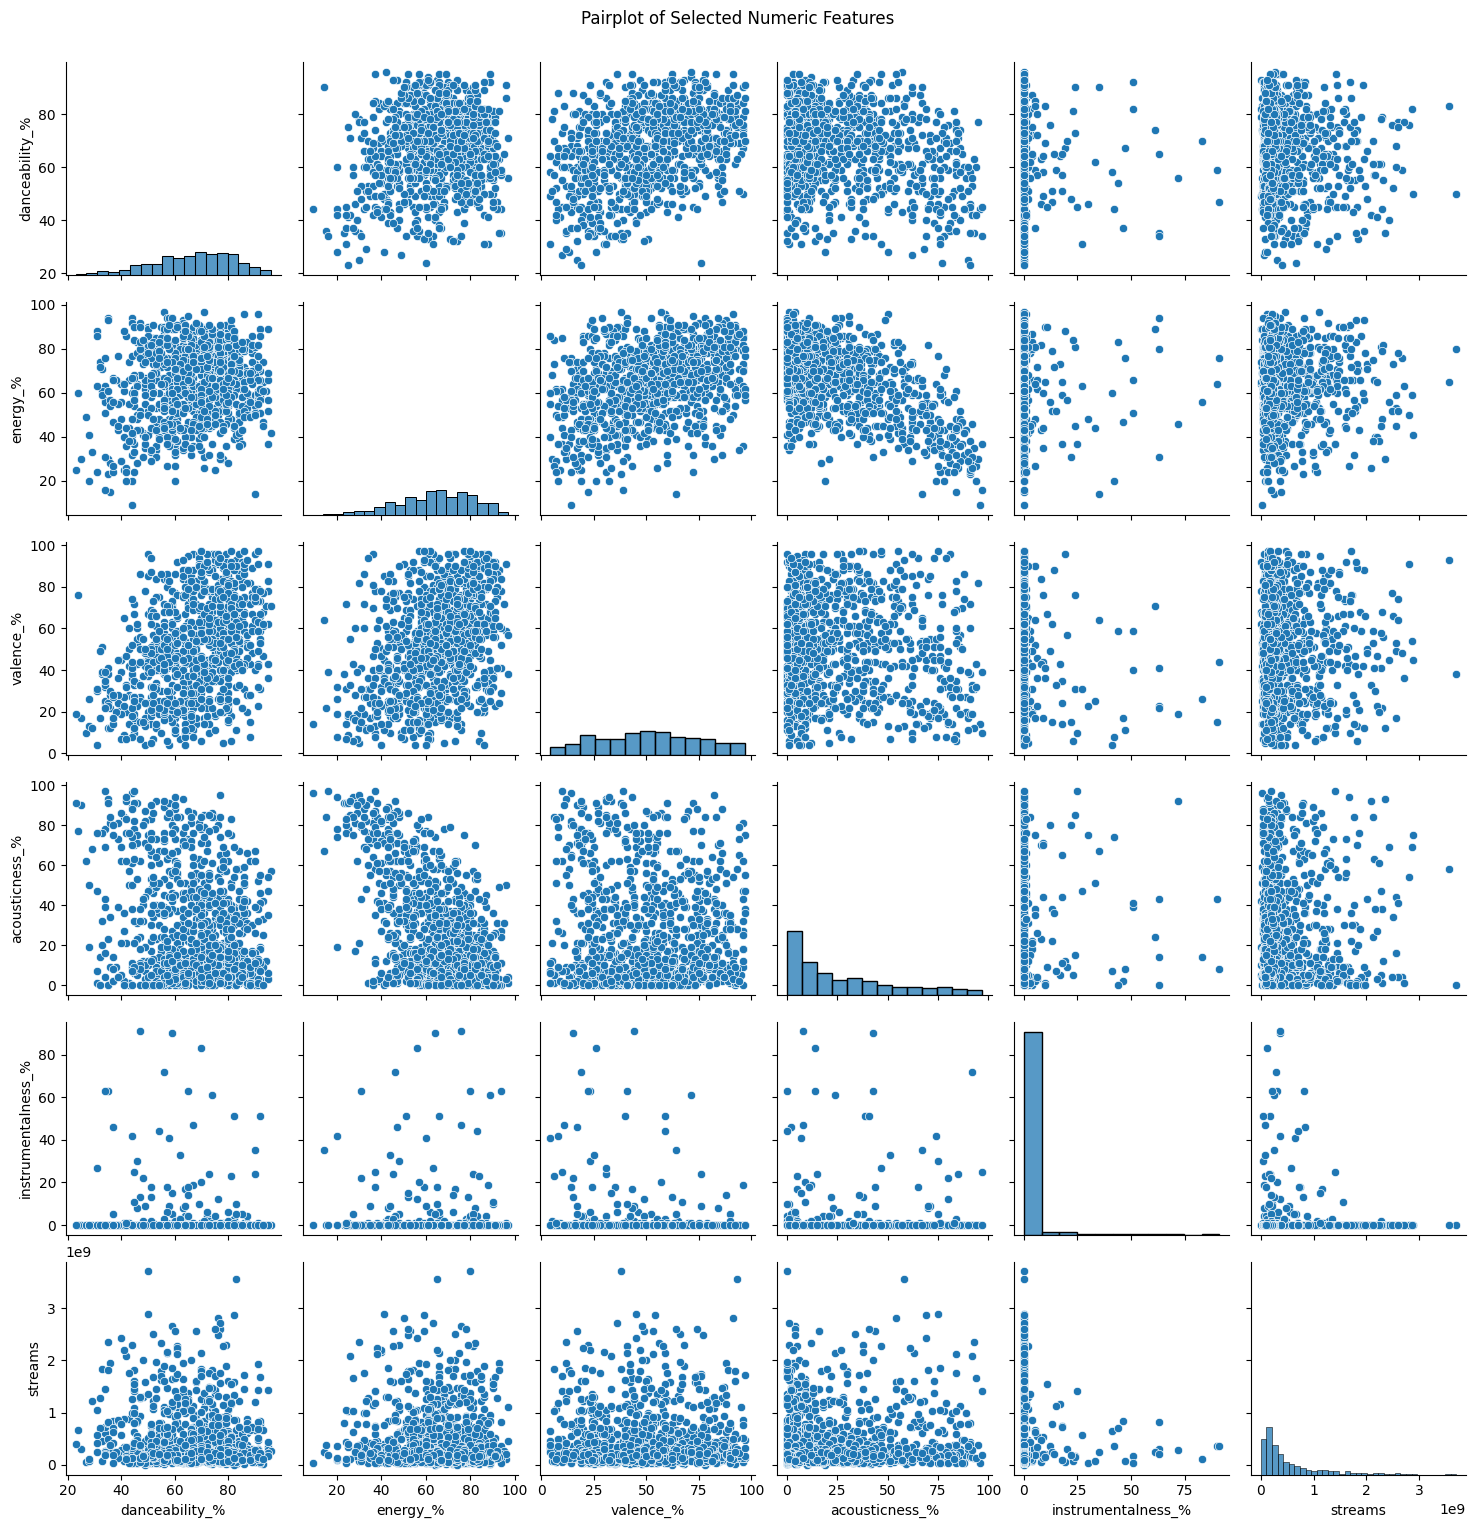

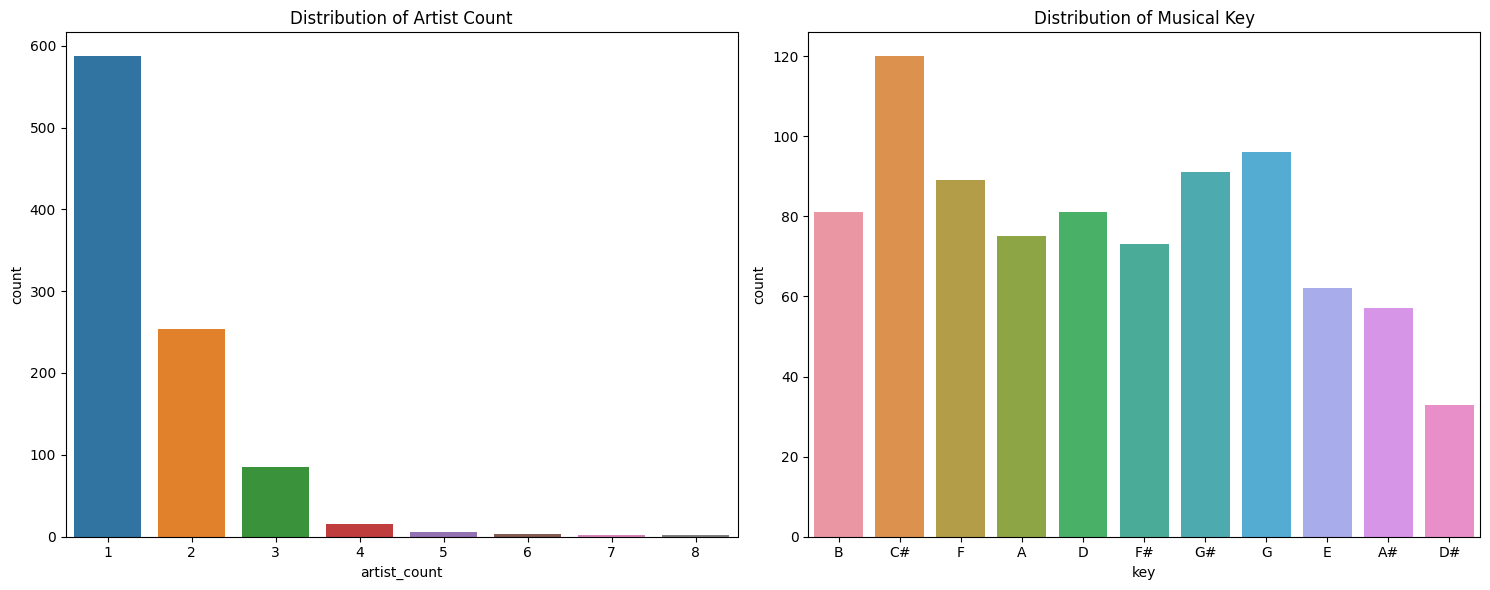

In [57]:
# Additional visualizations for the Spotify dataset
# We will create a pairplot to visualize the relationships among several numeric features
# Also, we will visualize the distribution of a few categorical features

# Selecting a subset of numeric features for pairplot
numeric_features_subset = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'streams']

# Creating a pairplot for the numeric features
sns.pairplot(df_numeric[numeric_features_subset])
plt.suptitle('Pairplot of Selected Numeric Features', y=1.02)  # Adjust the title position
plt.show()

# Visualizing the distribution of a few categorical features - artist count and key
plt.figure(figsize=(15, 6))

# Artist Count
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='artist_count')
plt.title('Distribution of Artist Count')

# Key
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='key')
plt.title('Distribution of Musical Key')

plt.tight_layout()
plt.show()

# Heatmap

In [58]:
import plotly.express as px
import pandas as pd

# Load your DataFrame
df = df
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Create the heatmap
fig = px.imshow(df_numeric.corr(),
                aspect="auto",
                color_continuous_scale='RdBu',
                labels=dict(color="Correlation Coefficient"),
                title="Correlation Matrix of Numeric Features")

# Display the plot
fig.show()


## Multivariate Analysis

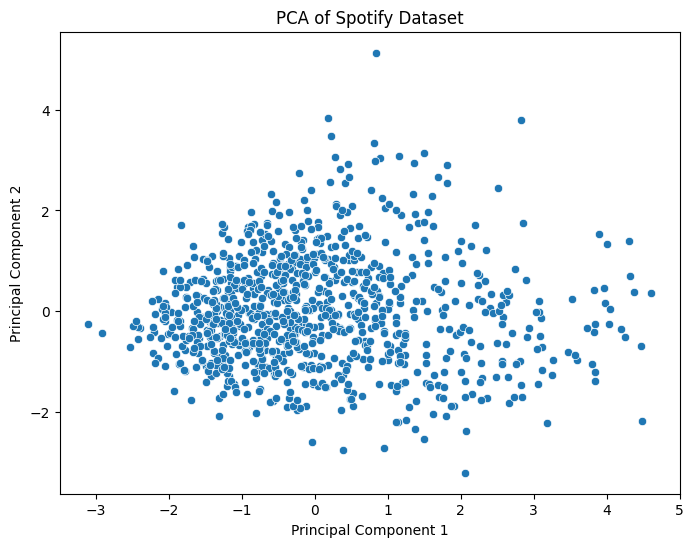

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Reload the dataset
df = df

# Selecting numeric features for PCA
numeric_features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'streams', 'bpm']
df_numeric_pca = df[numeric_features].apply(pd.to_numeric, errors='coerce')

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric_pca.dropna())

# Performing PCA
pca = PCA(n_components=2)  # Reduce to two dimensions
principal_components = pca.fit_transform(df_scaled)

# Creating a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

df_pca.head()

# Visualizing the principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2')
plt.title('PCA of Spotify Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [60]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your DataFrame
df = df

# Select numeric features and standardize them
numeric_features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'streams', 'bpm']
df_numeric = df[numeric_features].apply(pd.to_numeric, errors='coerce')
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric.dropna())

# Performing PCA for 3 components
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(df_scaled)

# Creating a DataFrame for the 3D PCA
df_pca_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])

# Visualizing the principal components in 3D
fig_3d = px.scatter_3d(df_pca_3d, x='PC1', y='PC2', z='PC3', title='3D PCA of Spotify Dataset')
fig_3d.show()


# Mengisi data yang kosong yang null

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [62]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [63]:
# Loading the dataset
df = df

# Identifying numeric columns for IQR method
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculating IQR for each numeric column
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bound for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replacing NaN values with IQR median (midpoint between Q1 and Q3)
for column in numeric_features:
    median_value = df[column].median()
    df[column] = df[column].apply(lambda x: median_value if pd.isna(x) else x)

# Checking for null values post replacement
null_counts_post_replacement = df.isnull().sum()

null_counts_post_replacement.head()  # Displaying the first few columns for verification


track_name        0
artist(s)_name    0
artist_count      0
released_year     0
released_month    0
dtype: int64

## mengisi data string yang null

In [64]:
# Filling null values in 'bpm' and 'key' columns with their respective modes

# Calculating the mode for 'bpm' and 'key'
key_mode = df['key'].mode()[0]
in_shazam_chart_mode = df['in_shazam_charts'].mode()[0]

# Replacing null values in 'bpm' and 'key' with their modes
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(in_shazam_chart_mode)
df['key'] = df['key'].fillna(key_mode)

# Checking for null values in 'bpm' and 'key' after replacement
null_counts_bpm_shazam = df[['bpm', 'in_shazam_charts']].isnull().sum()
null_counts_bpm_shazam

bpm                 0
in_shazam_charts    0
dtype: int64

In [65]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

## Kategorical Data Using Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder

# Creating label encoders for 'mode' and 'key' columns
label_encoder_mode = LabelEncoder()
label_encoder_key = LabelEncoder()

# Encoding the 'mode' and 'key' columns
df['mode'] = label_encoder_mode.fit_transform(df['mode'])
df['key'] = label_encoder_key.fit_transform(df['key'])

# Displaying the unique values and their encoded forms for reference
mode_mapping = dict(zip(label_encoder_mode.classes_, label_encoder_mode.transform(label_encoder_mode.classes_)))
key_mapping = dict(zip(label_encoder_key.classes_, label_encoder_key.transform(label_encoder_key.classes_)))

# Showing a portion of the updated dataframe along with the mappings
updated_data_sample = df[['mode', 'key']].head()
mode_mapping, key_mapping, updated_data_sample

({'Major': 0, 'Minor': 1},
 {'A': 0,
  'A#': 1,
  'B': 2,
  'C#': 3,
  'D': 4,
  'D#': 5,
  'E': 6,
  'F': 7,
  'F#': 8,
  'G': 9,
  'G#': 10},
    mode  key
 0     0    2
 1     0    3
 2     0    7
 3     0    0
 4     1    0)

In [67]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,2,0,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,3,0,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,7,0,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,0,0,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,0,1,65,23,80,14,63,11,6


# Data Preprocessing

## Normalization And Standarization

In [71]:
# Identifying non-numeric values in the columns intended for normalization and standardization
non_numeric_values = {}

# Checking the columns for normalization
for col in columns_to_normalize:
    non_numeric_values[col] = df[col].apply(lambda x: type(x)).value_counts().to_dict()

# Checking the columns for standardization
for col in columns_to_standardize:
    non_numeric_values[col] = df[col].apply(lambda x: type(x)).value_counts().to_dict()

non_numeric_values

NameError: name 'columns_to_normalize' is not defined

In [70]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,2,0,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,3,0,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,7,0,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,0,0,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,0,1,65,23,80,14,63,11,6


In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Dropping 'track_name' and 'artist(s)_name'
df = df.drop(columns=['track_name', 'artist(s)_name'])

# Assuming df is your DataFrame
# Define the columns to normalize and standardize
columns_to_normalize = ['released_year', 'released_month', 'released_day', 'mode', 'key']
columns_to_standardize = [col for col in df.columns if col not in columns_to_normalize + ['track_name', 'artist(s)_name']]

# Convert columns to numeric, setting errors='coerce' to handle non-numeric values
# Note: We apply this only to columns that are expected to be numeric
numeric_columns = columns_to_normalize + columns_to_standardize
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle NaN values if necessary (e.g., fill with mean, median, or drop)
df.fillna(df.mean(), inplace=True)

# Normalizing selected columns
scaler_normalization = MinMaxScaler()
df[columns_to_normalize] = scaler_normalization.fit_transform(df[columns_to_normalize])

# Standardizing other columns
scaler_standardization = StandardScaler()
df[columns_to_standardize] = scaler_standardization.fit_transform(df[columns_to_standardize])

# Displaying the transformed data
df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.497282,1.000000,0.545455,0.433333,-0.588731,6.899341,-0.658275,-0.287191,4.171462,-0.378285,...,0.087708,0.2,0.0,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829
1,-0.623072,1.000000,0.181818,0.733333,-0.472052,1.839470,-0.671811,-0.229318,1.464149,-0.302324,...,-1.089053,0.3,0.0,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829
2,-0.623072,1.000000,0.454545,0.966667,-0.481807,5.161607,-0.660708,0.303113,3.064823,-0.109501,...,0.551280,0.7,0.0,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966
3,-0.623072,0.956989,0.636364,0.733333,0.336718,4.497180,0.506309,0.557754,3.064823,0.089164,...,1.692382,0.0,0.0,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420
4,-0.623072,1.000000,0.363636,0.566667,-0.261878,1.941690,-0.372445,0.187368,1.602478,-0.132874,...,0.765237,0.0,1.0,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966


In [73]:
df.isnull().sum()

artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [74]:
df.to_csv("datafix.csv",index=False)

# Split Of Data

In [75]:
dataset_train = df
X = dataset_train.drop('streams' , axis =1)
y = dataset_train['streams']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)

dataset_test = df
dataset_test =dataset_test.drop(['streams'] , axis = 1)
dataset_test.dropna(inplace = True)
dataset_test.head(5)

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.497282,1.000000,0.545455,0.433333,-0.588731,6.899341,-0.287191,4.171462,-0.378285,1.215709,...,0.087708,0.2,0.0,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829
1,-0.623072,1.000000,0.181818,0.733333,-0.472052,1.839470,-0.229318,1.464149,-0.302324,1.878792,...,-1.089053,0.3,0.0,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829
2,-0.623072,1.000000,0.454545,0.966667,-0.481807,5.161607,0.303113,3.064823,-0.109501,1.878792,...,0.551280,0.7,0.0,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966
3,-0.623072,0.956989,0.636364,0.733333,0.336718,4.497180,0.557754,3.064823,0.089164,1.547251,...,1.692382,0.0,0.0,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420
4,-0.623072,1.000000,0.363636,0.566667,-0.261878,1.941690,0.187368,1.602478,-0.132874,2.044562,...,0.765237,0.0,1.0,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966


# Feature Selection

In [76]:
import plotly.express as px
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are already defined in your environment

# Create and fit the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Using Plotly to create a bar chart for feature importances
fig = px.bar(importances_df, 
             x='Importance', 
             y='Feature', 
             orientation='h', 
             color='Importance', 
             color_continuous_scale='Viridis')

# Updating layout for better readability
fig.update_layout(
    title='Feature Importance',
    xaxis_title='Importance',
    yaxis_title='Feature',
    height=600
)

# Showing the Plotly figure
fig.show()

In [77]:
## Modeling Algoritma

# Modeling Regression

## "Streams" Feature

# Support Vector Regression

In [78]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Create and fit the SVR (Support Vector Regressor) model with default parameters
SV = svm.SVR()
SV.fit(X_train, y_train)

# Perform cross-validation and compute the mean score
scores = cross_val_score(SV, X_train, y_train, cv=10)
mean_score = scores.mean()

print("Score:", mean_score)

Score: 0.7292148381187427


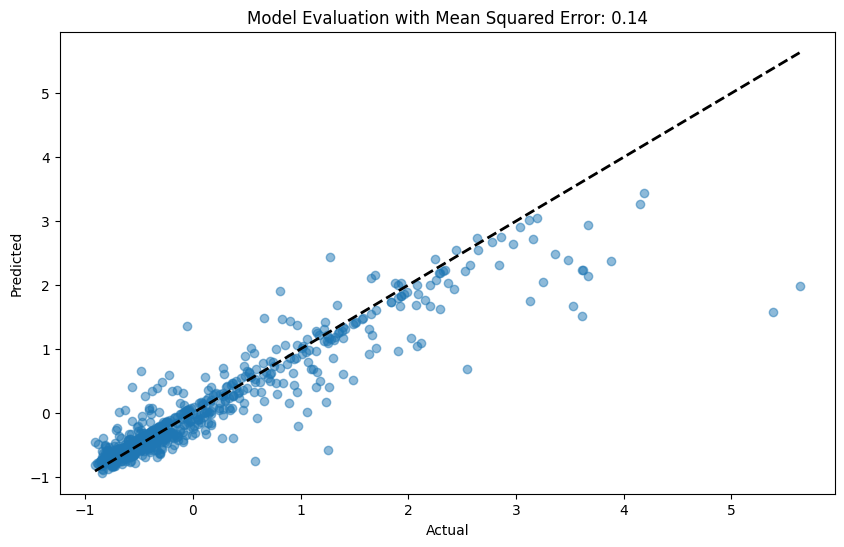

Mean Squared Error: 0.13919157573823132


In [79]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming SV is your trained model, and X_train, y_train are your training data and labels
# Replace 'SV' with the variable name of your trained model

# Predicting on the training data
y_pred = SV.predict(X_train)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Model Evaluation with Mean Squared Error: {mse:.2f}')
plt.show()

print("Mean Squared Error:", mse)

# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Assuming 'X_train' and 'y_train' are already defined in your environment
# If not, you'll need to define these variables with your training data

# Create and fit the DecisionTreeRegressor model with default parameters
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)

# Perform cross-validation and compute the mean score
scores = cross_val_score(DTR, X_train, y_train, cv=10)
mean_score2 = scores.mean()

print("Score:", mean_score2)

Score: 0.650460065077764


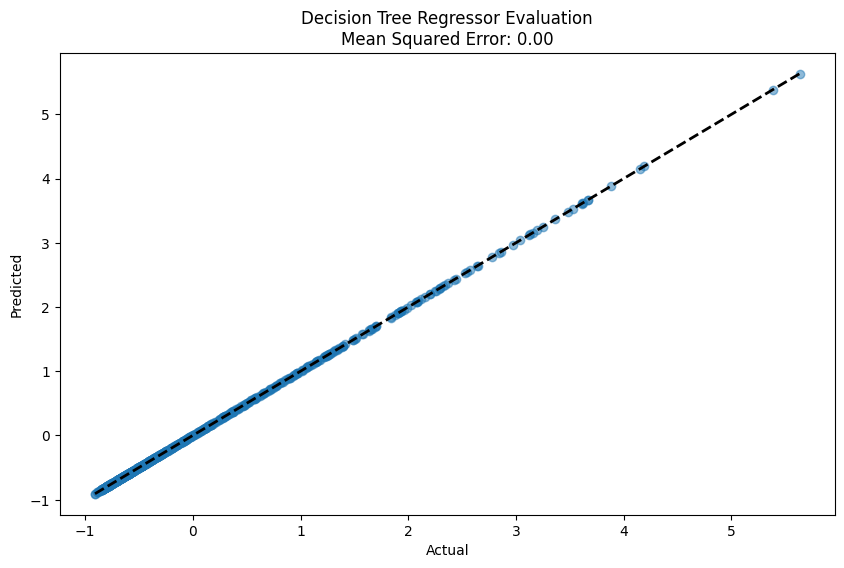

0.0

In [81]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Predicting on the training data
y_pred_dtr = DTR.predict(X_train)

# Calculating Mean Squared Error (MSE) for the Decision Tree Regressor
mse_dtr = mean_squared_error(y_train, y_pred_dtr)

# Plotting the actual vs predicted values for the Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_dtr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Decision Tree Regressor Evaluation\nMean Squared Error: {mse_dtr:.2f}')
plt.show()

mse_dtr

# Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Assuming 'X_train' and 'y_train' are already defined in your environment
# If not, you'll need to define these variables with your training data

# Create and fit the RandomForestRegressor model with default parameters
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

# Perform cross-validation and compute the mean score
scores = cross_val_score(RFR, X_train, y_train, cv=10)
mean_score_rf = scores.mean()

mean_score_rf

0.8172886618747232

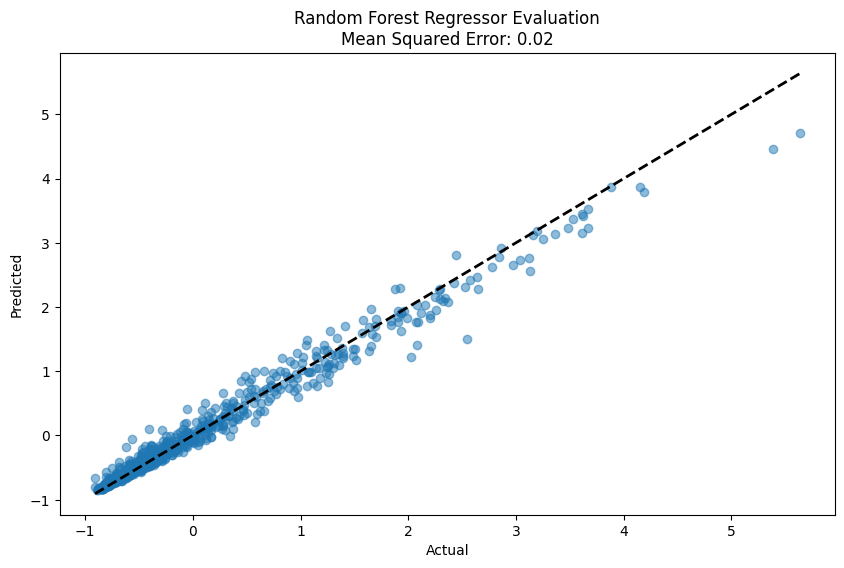

0.022525894599293335

In [83]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming the RandomForestRegressor model 'RFR' is already trained

# Predicting on the training data
y_pred_rfr = RFR.predict(X_train)

# Calculating Mean Squared Error (MSE) for the RandomForest Regressor
mse_rfr = mean_squared_error(y_train, y_pred_rfr)

# Plotting the actual vs predicted values for the RandomForest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_rfr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Random Forest Regressor Evaluation\nMean Squared Error: {mse_rfr:.2f}')
plt.show()

mse_rfr

# Hypertuning Random Forest

In [84]:
params ={
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]                          #bootstrap: Whether to bootstrap samples when building trees.
}
random_search = RandomizedSearchCV(
    estimator=RFR,
    param_distributions=params,
    n_iter=10,                                 # Number of random combinations to try
    cv=10,                                     # Number of cross-validation folds
    scoring="neg_mean_squared_error",          # Scoring metric
    n_jobs=-1,                                 # Use all available CPU cores
    random_state=42
)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 1000]},
                   random_state=42, scoring='neg_mean_squared_error')

In [85]:
random_search_rf_results = pd.concat([pd.DataFrame(random_search.cv_results_["params"]),pd.DataFrame(random_search.cv_results_["mean_test_score"], columns=["neg_mean_squared_error"])],axis=1)
random_search_rf_contour = random_search_rf_results.groupby(['max_depth','n_estimators']).mean()
random_search_rf_contour

min_samples_split  min_samples_leaf  \
max_depth n_estimators                                        
5         100                         3.0          2.333333   
          500                         4.0          2.333333   
10        100                         5.0          1.000000   
          500                         3.5          1.000000   
20        500                        10.0          2.000000   

                        neg_mean_squared_error  
max_depth n_estimators                          
5         100                        -0.190454  
          500                        -0.188404  
10        100                        -0.176568  
          500                        -0.175607  
20        500                        -0.179695

In [86]:
# Get the best hyperparameters from the search
best_params = random_search.best_params_
print("\nBest Hyperparameters:", best_params)

# Get the best model from the search
best_model = random_search.best_estimator_
print("\nBest model :" ,best_model)


Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}

Best model : RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=500)


In [87]:
RF = RandomForestRegressor(max_depth=40, max_features='log2', n_estimators=1000) 
RF.fit(X_train , y_train)
scores = cross_val_score(RF, X_train, y_train, cv=10)
print(scores)
print("\n mean of the Scores :" , scores.mean())

[0.75248011 0.82514925 0.79608181 0.74860063 0.82623514 0.86020305
 0.8008794  0.82325473 0.79308296 0.82918847]

 mean of the Scores : 0.8055155546384303


# Prediction Model

In [88]:
#np.set_printoptions(threshold=np.inf)
predict = RF.predict(dataset_test)
min = np.amin(predict)
max = np.amax(predict)
range = np.ptp(predict)
mean = np.mean(predict)
median = np.median(predict)
 
print("min =", min)
print("max =", max)
print("Median =", median)
print("Mean =", mean)
print("range =", range)
print("\nprediction =", predict)

min = -0.826286946083877
max = 4.5747160147990895
Median = -0.3570782690406996
Mean = -0.0005390458201262273
range = 5.401002960882966

prediction = [-6.39697673e-01 -6.05773599e-01 -3.53732071e-01  8.47626692e-01
 -3.21136564e-01 -5.11668703e-01 -2.83002604e-01 -7.46610725e-01
 -5.66282551e-01 -5.58731124e-02 -1.30325022e-01 -7.66247724e-01
  1.58581634e+00  1.14353820e-01  3.14088697e+00  1.03164417e+00
 -9.69329184e-02 -4.39831222e-02 -3.15724092e-01 -6.05389595e-01
 -6.90042622e-01 -7.20456042e-01  1.31795282e+00 -5.50424526e-01
 -5.77913093e-01 -7.37291655e-01  7.42828843e-01 -7.33936243e-01
 -2.37780595e-01 -3.96116602e-01 -7.57003925e-01 -7.49971407e-01
  5.71868394e-01  9.34915898e-01  9.62685479e-02 -6.09022658e-01
 -6.08545150e-01  1.29820674e+00  5.85310760e-01 -6.21910005e-01
 -4.00383452e-01  2.55385619e+00  1.28091560e+00  1.06277737e+00
 -6.86936595e-01  1.29902638e-01  9.94562022e-01 -8.89900869e-02
  3.16639024e+00 -7.90590994e-03 -5.38454155e-01 -3.94901301e-01
 -6.14

# Model Regression

## "in_spotify_playlist"

In [89]:
dataset_train = df
X = dataset_train.drop('in_spotify_playlists' , axis =1)
y = dataset_train['in_spotify_playlists']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1)

dataset_test = df
dataset_test =dataset_test.drop(['in_spotify_playlists'] , axis = 1)
dataset_test.dropna(inplace = True)
dataset_test.head(5)

,artist_count,released_year,released_month,released_day,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.497282,1.000000,0.545455,0.433333,6.899341,-0.658275,-0.287191,4.171462,-0.378285,1.215709,...,0.087708,0.2,0.0,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829
1,-0.623072,1.000000,0.181818,0.733333,1.839470,-0.671811,-0.229318,1.464149,-0.302324,1.878792,...,-1.089053,0.3,0.0,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829
2,-0.623072,1.000000,0.454545,0.966667,5.161607,-0.660708,0.303113,3.064823,-0.109501,1.878792,...,0.551280,0.7,0.0,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966
3,-0.623072,0.956989,0.636364,0.733333,4.497180,0.506309,0.557754,3.064823,0.089164,1.547251,...,1.692382,0.0,0.0,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420
4,-0.623072,1.000000,0.363636,0.566667,1.941690,-0.372445,0.187368,1.602478,-0.132874,2.044562,...,0.765237,0.0,1.0,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966


# Support Vector Regression

In [90]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Create and fit the SVR (Support Vector Regressor) model with default parameters
SV = svm.SVR()
SV.fit(X_train, y_train)

# Perform cross-validation and compute the mean score
scores = cross_val_score(SV, X_train, y_train, cv=10)
mean_score = scores.mean()

print("Score:", mean_score)

Score: 0.6222983155939226


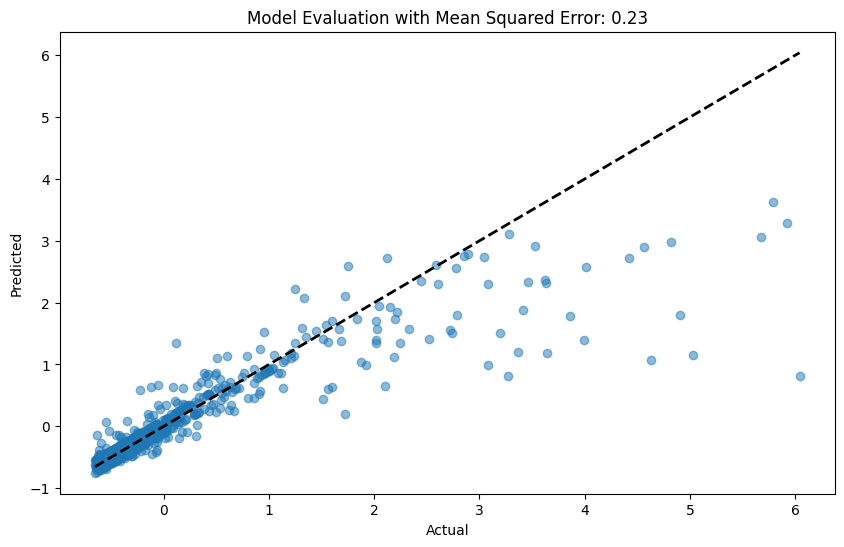

Mean Squared Error: 0.22850677740984557


In [91]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming SV is your trained model, and X_train, y_train are your training data and labels
# Replace 'SV' with the variable name of your trained model

# Predicting on the training data
y_pred = SV.predict(X_train)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Model Evaluation with Mean Squared Error: {mse:.2f}')
plt.show()

print("Mean Squared Error:", mse)

## Decision Tree

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Assuming 'X_train' and 'y_train' are already defined in your environment
# If not, you'll need to define these variables with your training data

# Create and fit the DecisionTreeRegressor model with default parameters
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)

# Perform cross-validation and compute the mean score
scores = cross_val_score(DTR, X_train, y_train, cv=10)
mean_score2 = scores.mean()

print("Score:", mean_score2)

Score: 0.5184876082993131


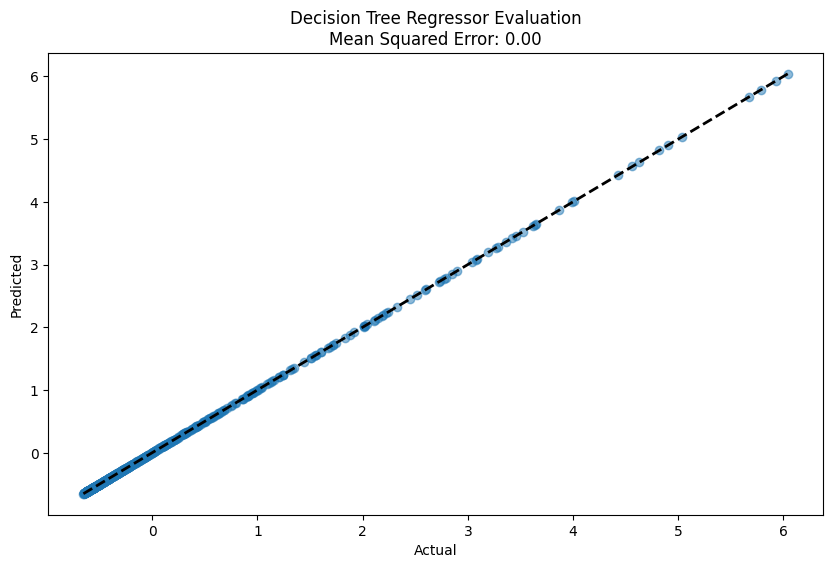

0.0

In [93]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Predicting on the training data
y_pred_dtr = DTR.predict(X_train)

# Calculating Mean Squared Error (MSE) for the Decision Tree Regressor
mse_dtr = mean_squared_error(y_train, y_pred_dtr)

# Plotting the actual vs predicted values for the Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_dtr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Decision Tree Regressor Evaluation\nMean Squared Error: {mse_dtr:.2f}')
plt.show()

mse_dtr

## RANDOM FOREST

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Assuming 'X_train' and 'y_train' are already defined in your environment
# If not, you'll need to define these variables with your training data

# Create and fit the RandomForestRegressor model with default parameters
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

# Perform cross-validation and compute the mean score
scores = cross_val_score(RFR, X_train, y_train, cv=10)
mean_score_rf = scores.mean()

mean_score_rf

0.7813467562148649

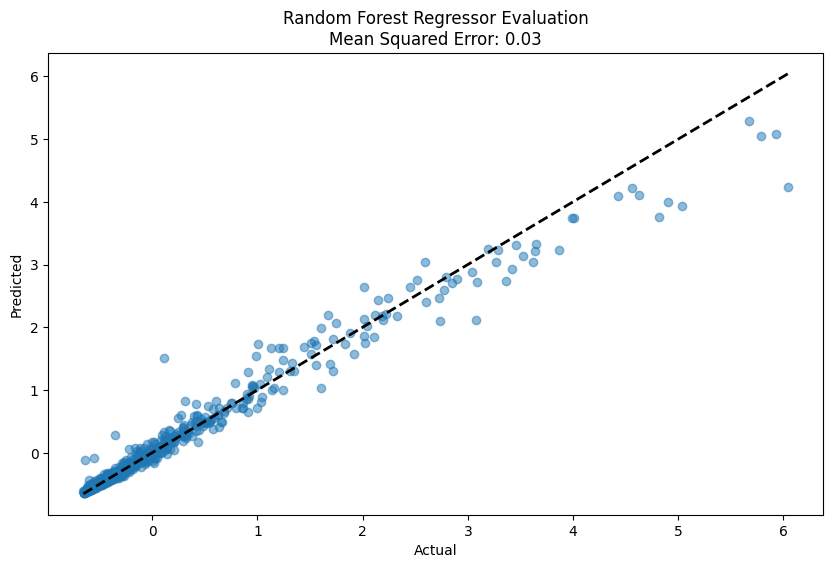

0.029624950206950558

In [95]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming the RandomForestRegressor model 'RFR' is already trained

# Predicting on the training data
y_pred_rfr = RFR.predict(X_train)

# Calculating Mean Squared Error (MSE) for the RandomForest Regressor
mse_rfr = mean_squared_error(y_train, y_pred_rfr)

# Plotting the actual vs predicted values for the RandomForest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_rfr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Random Forest Regressor Evaluation\nMean Squared Error: {mse_rfr:.2f}')
plt.show()

mse_rfr

# Hypertuning Parameter

In [96]:
params ={
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]                          #bootstrap: Whether to bootstrap samples when building trees.
}
random_search = RandomizedSearchCV(
    estimator=RFR,
    param_distributions=params,
    n_iter=10,                                 # Number of random combinations to try
    cv=10,                                     # Number of cross-validation folds
    scoring="neg_mean_squared_error",          # Scoring metric
    n_jobs=-1,                                 # Use all available CPU cores
    random_state=42
)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 1000]},
                   random_state=42, scoring='neg_mean_squared_error')

In [97]:
random_search_rf_results = pd.concat([pd.DataFrame(random_search.cv_results_["params"]),pd.DataFrame(random_search.cv_results_["mean_test_score"], columns=["neg_mean_squared_error"])],axis=1)
random_search_rf_contour = random_search_rf_results.groupby(['max_depth','n_estimators']).mean()
random_search_rf_contour

min_samples_split  min_samples_leaf  \
max_depth n_estimators                                        
5         100                         3.0          2.333333   
          500                         4.0          2.333333   
10        100                         5.0          1.000000   
          500                         3.5          1.000000   
20        500                        10.0          2.000000   

                        neg_mean_squared_error  
max_depth n_estimators                          
5         100                        -0.224552  
          500                        -0.220095  
10        100                        -0.222665  
          500                        -0.212929  
20        500                        -0.217043

In [98]:
# Get the best hyperparameters from the search
best_params = random_search.best_params_
print("\nBest Hyperparameters:", best_params)

# Get the best model from the search
best_model = random_search.best_estimator_
print("\nBest model :" ,best_model)


Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}

Best model : RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=500)


In [99]:
RF = RandomForestRegressor(max_depth=40, max_features='log2', n_estimators=1000) 
RF.fit(X_train , y_train)
scores = cross_val_score(RF, X_train, y_train, cv=10)
print(scores)
print("\n mean of the Scores :" , scores.mean())

[0.65203285 0.73294565 0.8412646  0.80944325 0.82290271 0.90133523
 0.77357043 0.78738574 0.70826422 0.81325939]

 mean of the Scores : 0.7842404075505615


# Prediction Model

In [100]:
#np.set_printoptions(threshold=np.inf)
predict = RF.predict(dataset_test)
min = np.amin(predict)
max = np.amax(predict)
range = np.ptp(predict)
mean = np.mean(predict)
median = np.median(predict)
 
print("min =", min)
print("max =", max)
print("Median =", median)
print("Mean =", mean)
print("range =", range)
print("\nprediction =", predict)

min = -0.6338414473154498
max = 4.910346510174099
Median = -0.3569147516742017
Mean = 0.006078060094543895
range = 5.544187957489549

prediction = [-5.16543014e-01 -4.41367404e-01 -1.82501979e-01  5.09157444e-01
 -2.59780469e-01 -2.41359660e-01 -2.96343249e-01 -5.53978795e-01
 -3.44115555e-01 -2.69361686e-01 -2.95835233e-01 -5.75660403e-01
  1.07697758e+00 -3.90561957e-03  2.15513802e+00  4.40987503e-01
 -2.59429672e-01 -1.71250266e-01 -3.37887998e-01 -4.68891187e-01
 -5.98399088e-01 -5.29767879e-01  1.12765292e+00 -4.93067137e-01
 -3.74475229e-01 -6.14611361e-01  3.14637024e-01 -5.24178318e-01
 -3.58166927e-01 -1.95490446e-01 -4.96657576e-01 -5.94498646e-01
  1.78686451e-01  5.25828704e-01  1.39652409e-02 -4.61566013e-01
 -5.52167803e-01  1.13263983e+00  5.62878469e-01 -5.79693993e-01
 -5.63595105e-01  1.79188370e+00  1.03684716e+00  9.04881027e-01
 -4.46297559e-01 -1.67313211e-01  4.84270779e-01  7.12189969e-01
  2.78010100e+00 -2.02659795e-01 -4.35156189e-01 -2.44232266e-02
 -5.2015

# Model Clustering

## # Clustering Using Feature BPM

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



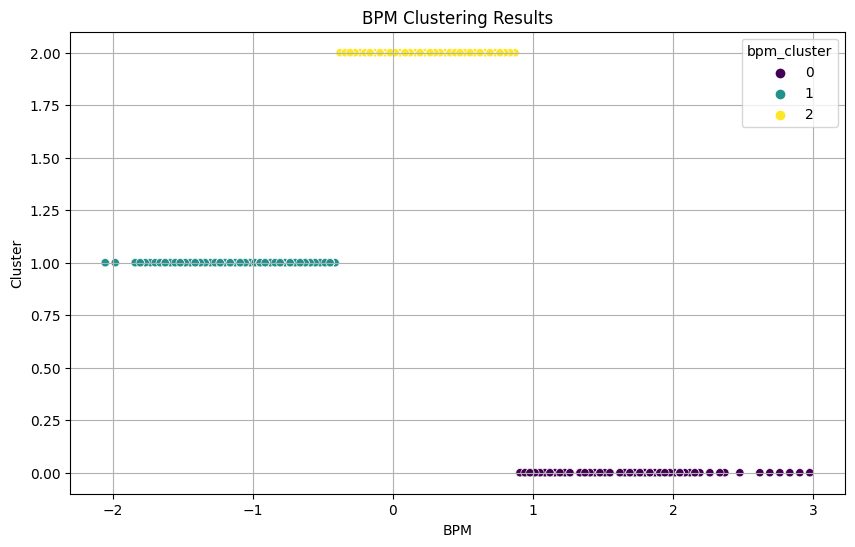

In [103]:
from sklearn.cluster import KMeans

# Selecting the 'bpm' column for clustering
bpm_data = df[['bpm']]

# Choosing a number of clusters (starting with 3)
n_clusters = 3

# Performing K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['bpm_cluster'] = kmeans.fit_predict(bpm_data)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bpm', y='bpm_cluster', hue='bpm_cluster', palette='viridis')
plt.title('BPM Clustering Results')
plt.xlabel('BPM')
plt.ylabel('Cluster')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



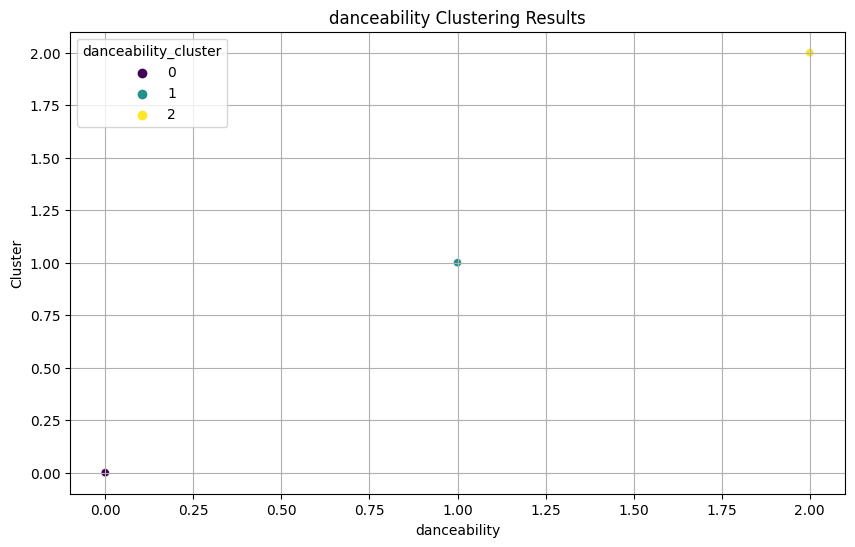

In [112]:
from sklearn.cluster import KMeans

# Selecting the 'bpm' column for clustering
bpm_data = df[['danceability_%']]

# Choosing a number of clusters (starting with 3)
n_clusters = 3

# Performing K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['danceability_cluster'] = kmeans.fit_predict(bpm_data)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability_%', y='danceability_cluster', hue='danceability_cluster', palette='viridis')
plt.title('danceability Clustering Results')
plt.xlabel('danceability')
plt.ylabel('Cluster')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



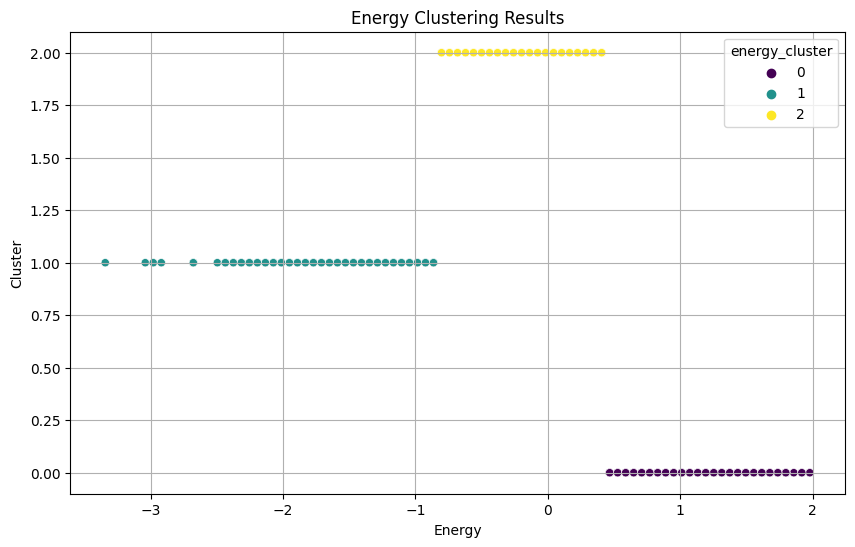

In [113]:
from sklearn.cluster import KMeans

# Selecting the 'bpm' column for clustering
bpm_data = df[['energy_%']]

# Choosing a number of clusters (starting with 3)
n_clusters = 3

# Performing K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['energy_cluster'] = kmeans.fit_predict(bpm_data)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='energy_%', y='energy_cluster', hue='energy_cluster', palette='viridis')
plt.title('Energy Clustering Results')
plt.xlabel('Energy')
plt.ylabel('Cluster')
plt.grid(True)
plt.show()